[Reference](https://freshrimpsushi.github.io/posts/newton-raphson-method/)

In [45]:
def job(v):
    x, y = v
    return np.array([[1-np.sin(x-y), np.sin(x-y) ], [np.cos(x+y), -1 + np.cos(x+y)]])

In [63]:
def grad(v):
    x, y = v
    return np.array([ 2*(1-np.sin(x-y))*(x+np.cos(x-y)) + 2*np.cos(x+y)*(np.sin(x+y) -y), 
                    2*(np.sin(x-y))*(x+np.cos(x-y)) + 2*(-1+np.cos(x+y))*(np.sin(x+y) -y)])

In [78]:
def loss(v):
    x, y = v
    return (x+np.cos(x-y))**2 + (np.sin(x+y) -y)**2

In [52]:
def func(v):
    x, y = v
    return np.array([x+np.cos(x-y), -y+np.sin(x+y)])

In [56]:
def newton(a, n_iter = 30):
    for _ in range(n_iter):
        a -= np.linalg.inv(job(a)).dot(func(a))
    return a

In [307]:
def newton_trj(a, n_iter = 100):
    a = copy.deepcopy(a)
    li = []
    for _ in range(n_iter):
        
        a1 = copy.deepcopy(a)
        if np.square(func(a1)).sum()>2:
            break
        li.append(a1)
        delta = np.linalg.inv(job(a)).dot(func(a))
        print(delta)
        a -= delta
    return np.array(li)

In [152]:
def gd(w, eta = .0001, n_iter = 100000):
    for _ in range(n_iter):
        w -= grad(w)*eta
    return w

In [281]:
def gd_trj(w, eta = .0001, n_iter = 10):
    w = copy.deepcopy(w)
    li = []
    for _ in range(n_iter):
        w_ = copy.deepcopy(w)
        li.append(w_)
        w -= grad(w)*eta
    return np.array(li)

In [287]:
def mnt_trj(w, v=0, m = .5, eta = .001, n_iter = 10000):
    w = copy.deepcopy(w)
    li = []
    for _ in range(n_iter):
        w_ = copy.deepcopy(w)
        li.append(w_)
        v = m*v - grad(w)*eta
        w += v
    return np.array(li)

In [257]:
x_ = np.linspace(-2,2,2000)
y_ = np.linspace(-2,2,2000)

In [258]:
xm, ym = np.meshgrid(x_, y_)

In [259]:
xm_ = xm.ravel()
ym_ = ym.ravel()

In [260]:
fv = np.array([loss([xm_[i], ym_[i]]) for i in range(xm_.size)])

In [246]:
gt = gd_trj([0,-2], eta = .001, n_iter = 10000)

In [290]:
mnt_trj(initial, v=1, eta=.1)[-1]

array([-0.20928079,  1.04254092])

In [286]:
gt[-1]

array([-0.20928079,  1.04254092])

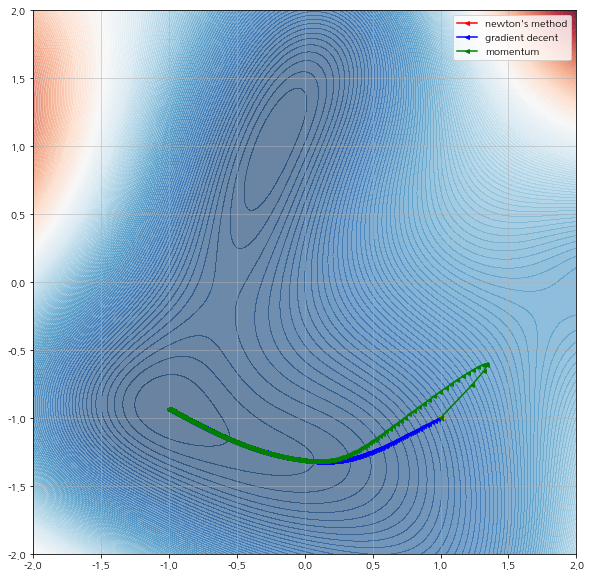

In [298]:
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(.5, alpha=1., linewidth=.5)
plt.contourf(xm, ym, fv.reshape(xm.shape), cmap =plt.cm.RdBu_r, alpha = .6, levels=200)

initial = [1,-1]
plt.scatter(*initial, color='k')

new_trj = newton_trj(initial, 1)
plt.scatter(*new_trj[-1], color='y', alpha=1.)
plt.plot(new_trj[:, 0], new_trj[:,1], color='r', marker='<', markersize=4, label="newton's method")

gt = gd_trj(initial, eta=.01, n_iter=10000)
plt.plot(gt[:, 0], gt[:,1], color='b', marker='<', markersize=4, label='gradient decent')

mt = mnt_trj(initial, v=.5, eta=.01, n_iter=10000)
plt.plot(mt[:, 0], mt[:,1], color='g', marker='<', markersize=4, label='momentum')

plt.legend()
plt.show()